# Fun with statistics & algorithms

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sys

sys.path.append('../src')

from hill_climber import HillClimber

## 1. Simulated annealing

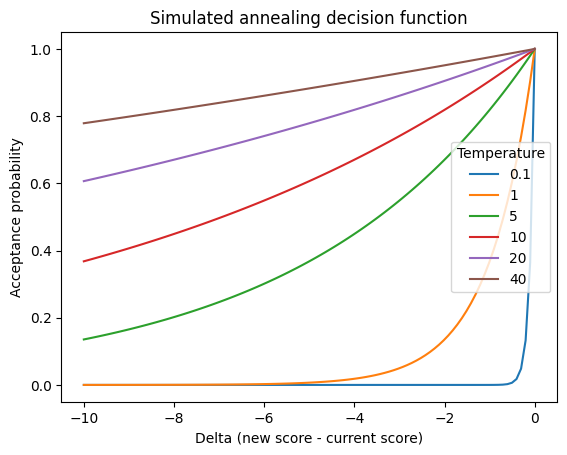

In [2]:
def decision_function(delta, temp):
    '''Calculate acceptance probability for simulated annealing.
    
    Args:
        delta: Difference between new and current objective values
        temp: Current temperature
        
    Returns:
        Acceptance probability (float)
    '''
    return np.exp(delta / temp)

deltas = np.linspace(-10, 0, 100)
temps = [0.1, 1, 5, 10, 20, 40]

plt.title('Simulated annealing decision function')

for temp in temps:
    plt.plot(deltas, decision_function(deltas, temp), label=temp)
    plt.xlabel('Delta (new score - current score)')
    plt.ylabel('Acceptance probability')

plt.legend(title='Temperature')
plt.show()

## 2. Hill climbing

### 2.1. Function definitions

#### 2.1.1. Hill climbing functions

#### 2.1.2. Objective functions

In [3]:
def objective_spearman_large_pearson_small(x, y):
    '''Maximize Spearman correlation while minimizing Pearson correlation.
    
    Objective function: |Spearman| - |Pearson|
    
    This encourages:
        - Small Pearson correlation (close to 0)
        - Large Spearman correlation (close to +/-1)
    
    Useful for finding non-linear monotonic relationships.
    
    Args:
        x: First variable (array-like)
        y: Second variable (array-like)
    
    Returns:
        Tuple of (metrics_dict, objective_value) where:
            - metrics_dict: Dict with 'Pearson coefficient' and 'Spearman coefficient'
            - objective_value: |Spearman| - |Pearson|
    '''
    pearson_corr = pd.Series(x).corr(pd.Series(y), method='pearson')
    spearman_corr = pd.Series(x).corr(pd.Series(y), method='spearman')
    objective = abs(spearman_corr) - abs(pearson_corr)
    
    metrics = {
        'Pearson coefficient': pearson_corr,
        'Spearman coefficient': spearman_corr
    }
    
    return metrics, objective


def objective_max_absolute_difference(x, y):
    '''Maximize absolute difference between Pearson and Spearman correlations.
    
    Objective function: |Spearman - Pearson|
    
    This encourages the largest possible difference between the two correlation
    measures, regardless of which is larger.
    
    Args:
        x: First variable (array-like)
        y: Second variable (array-like)
    
    Returns:
        Tuple of (metrics_dict, objective_value) where:
            - metrics_dict: Dict with 'Pearson coefficient' and 'Spearman coefficient'
            - objective_value: |Spearman - Pearson|
    '''
    pearson_corr = pd.Series(x).corr(pd.Series(y), method='pearson')
    spearman_corr = pd.Series(x).corr(pd.Series(y), method='spearman')
    objective = abs(spearman_corr - pearson_corr)
    
    metrics = {
        'Pearson coefficient': pearson_corr,
        'Spearman coefficient': spearman_corr
    }
    
    return metrics, objective


def objective_pearson_large_spearman_small(x, y):
    '''Maximize Pearson correlation while minimizing Spearman correlation.
    
    Objective function: |Pearson| - |Spearman|
    
    This encourages:
        - Large Pearson correlation (close to +/-1)
        - Small Spearman correlation (close to 0)
    
    Note: This is difficult to achieve as strong linear relationships
    typically imply strong monotonic relationships.
    
    Args:
        x: First variable (array-like)
        y: Second variable (array-like)
    
    Returns:
        Tuple of (metrics_dict, objective_value) where:
            - metrics_dict: Dict with 'Pearson coefficient' and 'Spearman coefficient'
            - objective_value: |Pearson| - |Spearman|
    '''
    pearson_corr = pd.Series(x).corr(pd.Series(y), method='pearson')
    spearman_corr = pd.Series(x).corr(pd.Series(y), method='spearman')
    objective = abs(pearson_corr) - abs(spearman_corr)
    
    metrics = {
        'Pearson coefficient': pearson_corr,
        'Spearman coefficient': spearman_corr
    }
    
    return metrics, objective

### 2.2. Input distributions

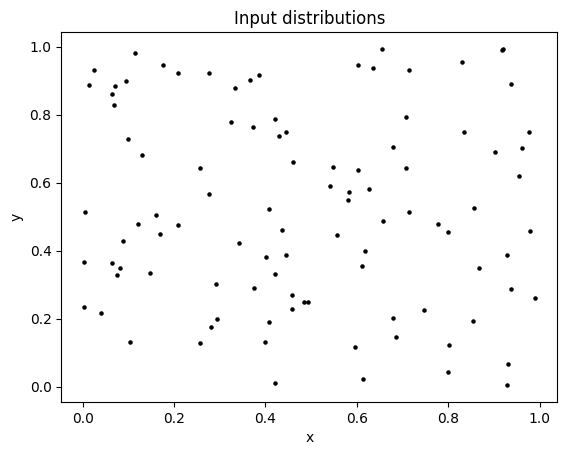

In [ ]:
# Create input distribution
n = 100

data = pd.DataFrame({
    'x': np.random.rand(n),
    'y': np.random.rand(n)
})

### 2.3. Run parameters

In [5]:
# Set hyperparameters
max_time = 1
step_size = 0.1
replicates = 1
temperature = 40.0
initial_noise = 0.1
cooling_rate = 0.9999999
objective_func = objective_spearman_large_pearson_small

### 2.4. Hill climbing run

In [ ]:
# Run hill climbing
filename = f"../data/hill_climb_results_{objective_func.__name__}_{max_time:.1f}min.pkl"

# Create HillClimber instance
climber = HillClimber(
    data=data,
    objective_func=objective_func,
    max_time=max_time,
    step_size=step_size,
    temperature=temperature,
    cooling_rate=cooling_rate,
    mode='maximize'
)

# Plot the input data
climber.plot_input()

# Run parallel optimization
results = climber.climb_parallel(
    replicates=replicates,
    initial_noise=initial_noise,
    output_file=filename
)

Results saved to: ../data/hill_climb_results_objective_spearman_large_pearson_small_1.0min.pkl


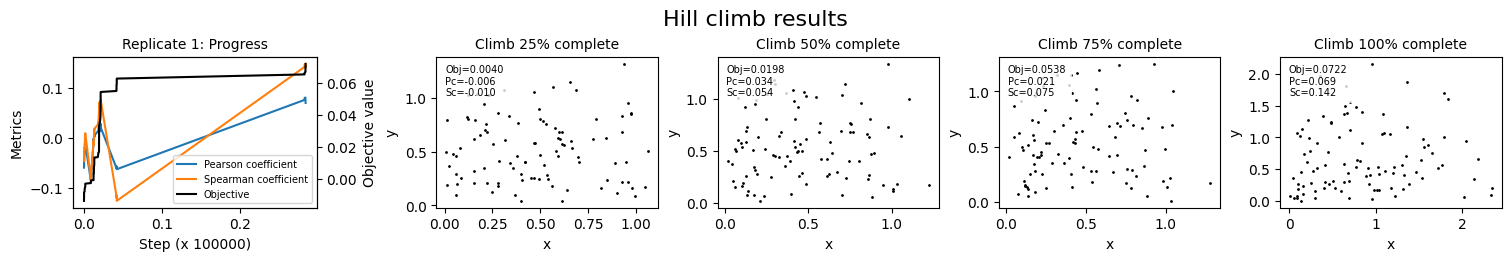

In [ ]:
# Visualize results
climber.plot_results(results)

## 2. Solutions

In [8]:
def load_hill_climb_results(filename):
    '''Load and inspect saved hill climbing results.
    
    Args:
        filename: Path to the pickle file containing results
        
    Returns:
        Dictionary containing results, hyperparameters, and metadata
    '''
    with open(filename, 'rb') as f:
        results_package = pickle.load(f)
    
    print(f"Loaded results from: {filename}")
    print(f"Objective function: {results_package['hyperparameters']['objective_function']}")
    print(f"Runtime: {results_package['runtime_minutes']:.2f} minutes")
    print(f"Hyperparameters:")
    for key, value in results_package['hyperparameters'].items():
        if key != 'objective_function':
            print(f"  {key}: {value}")
    
    return results_package